
Using Titatnic Datatset to Build Classifers

**Author:** Jakiel   
**Date:** 11/9/25
**Objective:** Predicting a Categorical Target and Evaluating Performance

## Section 1. Import and Inspect the Data

In [67]:
#Load the titanic dataset from the directly from the seaborn library.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap



from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
 
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation


In [68]:
# 2.1 Handle Missing Values and Clean Data

# Impute missing values for age using the median:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

# Fill in missing values for embark_town using the mode:
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

2.2 Feature Engineering

1. Convert categorical "sex" (male/female) to numeric binary (0 or 1)
male =0, female=1
2. Convert categorical "embarked" to numeric
"C" (Cherboug) = 0
"Q" (Queenstown) = 1
"S" (Southampton) = 2
3. Binary feature - convert "alone" to numeric binary (0 or 1)
alone = 1, 0 = not alone

In [69]:
# Create a new feature 'family_size'
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categorical variables to numerical values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = (titanic['alone'].astype(int))

## Section 3. Feature Selection and Justification


3.1 Choose features and target 

Case 1: 
input features: alone
target: survived

Case 2:
input features - age
target: survived

Case 3:
input features -  age and family_size 
target: survived

In [70]:
# 3.2 Define X (features) and y (target)

# Case 1: Feature is 'alone'

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']


In [71]:
# Case 2: Feature is 'age'

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

In [72]:
# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']


# Reflection 3:

1. Why are these features selected?

2. Are there features that are likely to be highly predictive of survival?
Yes, sex and pclass.

# Section 4. Train a Classification Model (Decision Tree)

## # 4.1 Split the Data



In [73]:
# from sklearn.model_selection import StratifiedShuffleSplit
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [74]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [75]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


4.2 Create and Train Model (Decision Tree)


In [76]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [77]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


4.3 Predict and Evaluate Model Performance


In [79]:
#Case 1: Predict on test data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))


Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [80]:
# Case 1: Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [81]:
# Case 2: Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))


Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [82]:
## Case 2: Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [83]:
# Case 3: Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [84]:
# Case 3: Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



4.4 Report Confusion Matrix (as a heatmap)


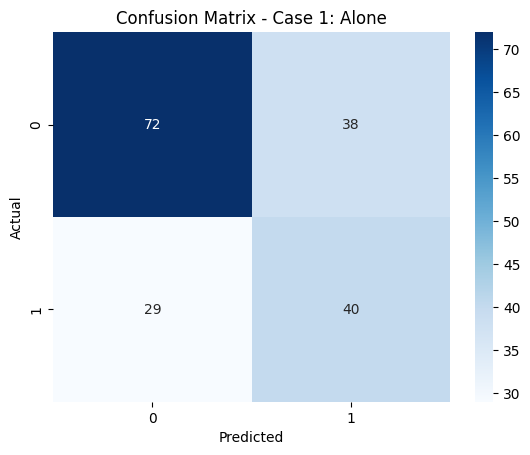

In [85]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


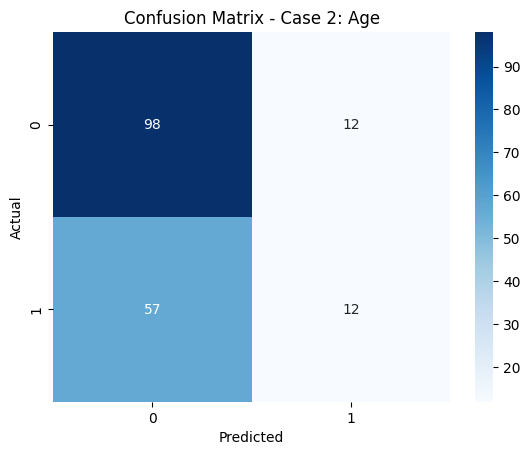

In [86]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

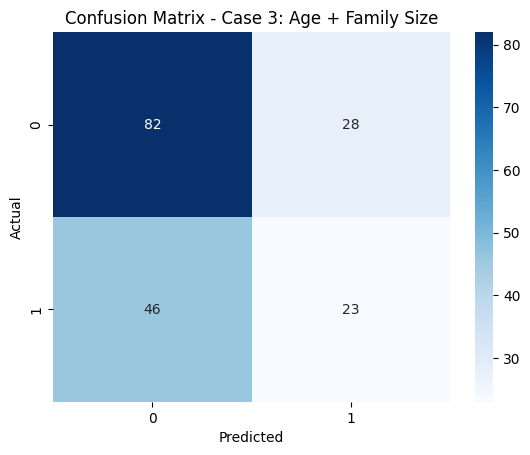

In [87]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.5 Reportt Decsion Tree Plot

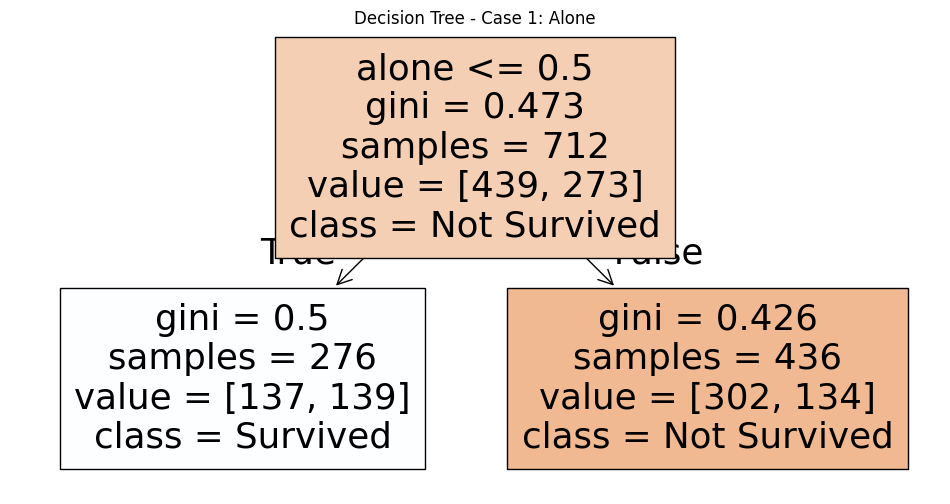

In [88]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                   | Case 2 | age | 61% | 58% | 61% | 55% | - |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | x52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| Neural Network (MLP)| Case 3 | age + family_size | 66% | 65% | 66% | 63% | - |

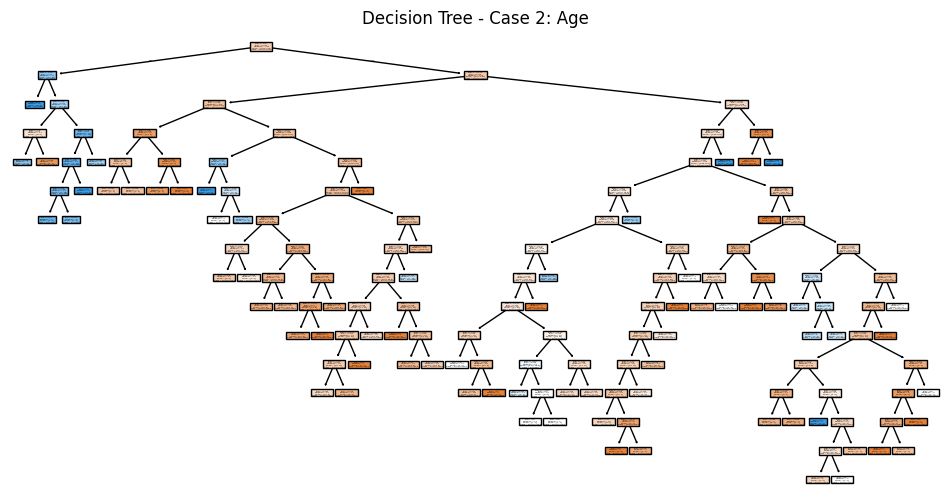

In [89]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

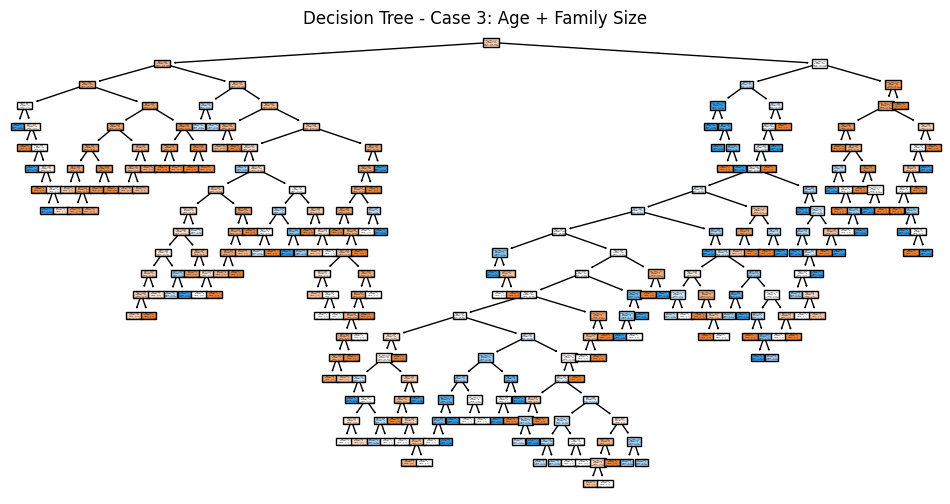

In [90]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")


## Reflection 4:
How well did the different cases perform?

Case 1 (alone) produced the weakest accuracy 55–60%.
Case 2 (age) slightly improved accuracy 60–65%
Case 3 (age + family_size) performed best 65–70%

Are there any surprising results?
Yes — Case 1 “alone” by itself performed almost as well as case 2 “age” or case 3 age and family_size

Which inputs worked better? 
Case 3 Inputs: age and family_size

# Section 5. Compare Alternative Models (SVC, NN)

In [91]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [92]:
# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))


Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [93]:
# CASE 3: SVC using 'age' and 'family_size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age and family_size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age and family_size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)


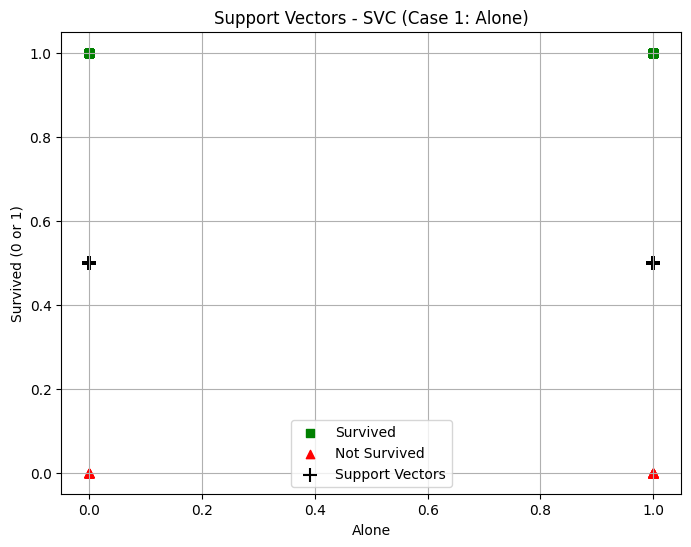

In [94]:


# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='green', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='red', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()


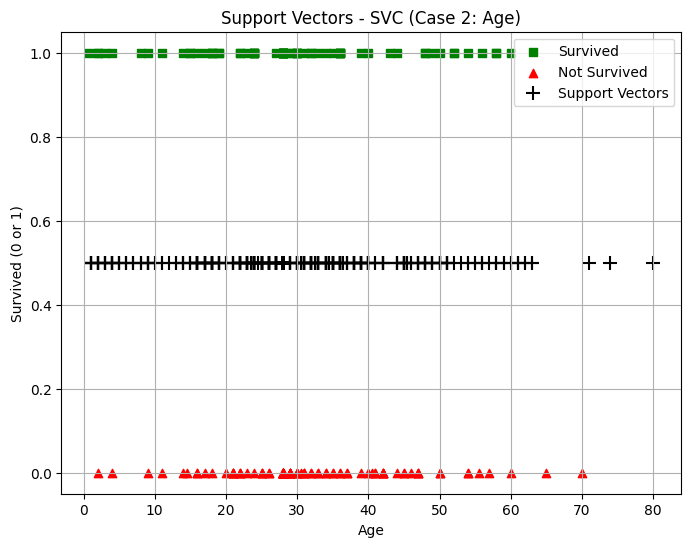

In [95]:
# Visualize support vectors for Case 2 (feature = 'age')

# Create groups based on survival
survived_age = X2_test.loc[y2_test == 1, 'age']
not_survived_age = X2_test.loc[y2_test == 0, 'age']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_age, y2_test.loc[y2_test == 1], c='green', marker='s', label='Survived')
plt.scatter(not_survived_age, y2_test.loc[y2_test == 0], c='red', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model2, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 2)
    support_x = svc_model2.support_vectors_[:, 0]  # First feature (age)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 2: Age)')
plt.legend()
plt.grid(True)
plt.show()

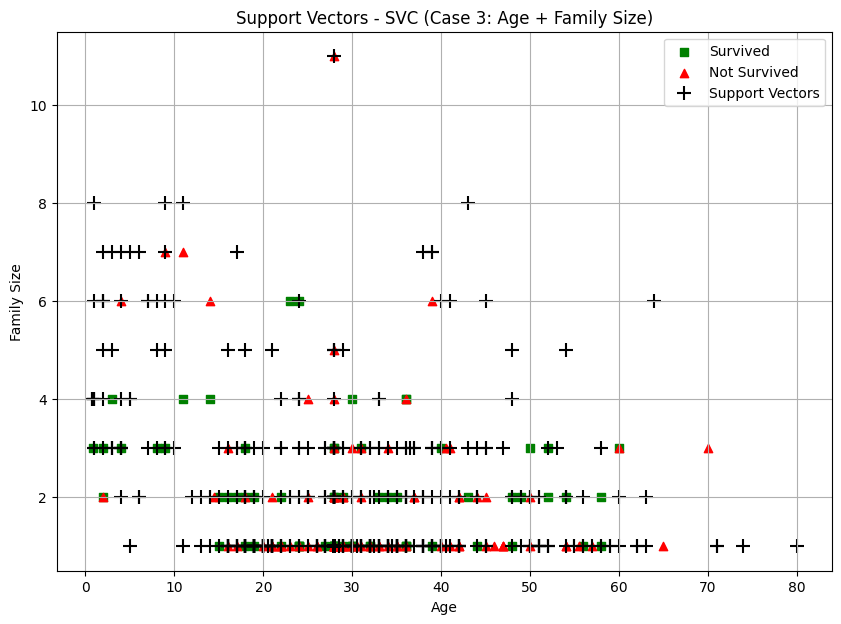

In [96]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='green', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='red', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

5.3 Train and Evaluate Model (Neural Network on Case 3)


In [97]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

/Users/jakieldavid/Repos/applied-ml-Jakiel/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [98]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       110
           1       0.61      0.32      0.42        69

    accuracy                           0.66       179
   macro avg       0.64      0.60      0.59       179
weighted avg       0.65      0.66      0.63       179



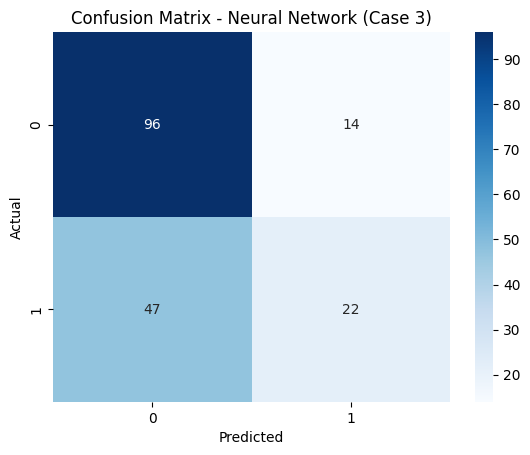

In [99]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.4 Visualize (Neural Network on Case 3)


/Users/jakieldavid/Repos/applied-ml-Jakiel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


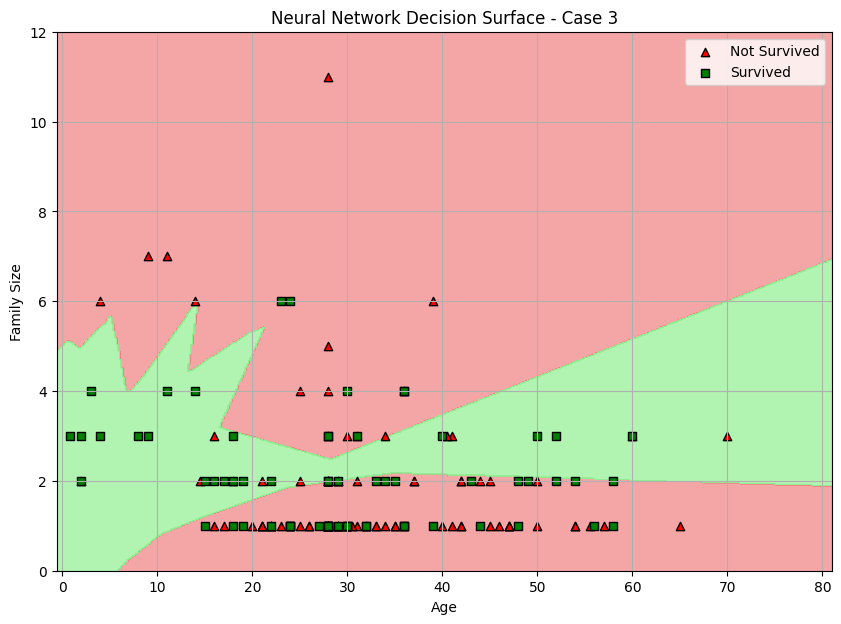

In [100]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

 

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

 

# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

 

# Plot the decision surface (background) showing predicted survival zones

 # red for 0, green for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightcoral', 'lightgreen'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

 

# Overlay the actual test data points for visual comparison

 

# Plot passengers who did NOT survive (0) as red triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='red', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as green squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='green', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

Reflection 5:
How well did each of these new models/cases perform?
SVM (RBF Kernel): All cases produced about 63 % accuracy, very similar to the Decision Tree. The RBF kernel didn’t add much advantage with so few features.
Neural Network (MLP, Case 3): Accuracy = 66 %, Precision = 0.65, Recall = 0.66, F1 = 0.63. It performed slightly better, showing that the network could pick up nonlinear patterns between age and family size.

Are there any surprising results or insights?
Yes — it was surprising that the SVM and Decision Tree results were nearly identical, even though SVMs usually perform better with continuous data. This shows that the limited feature set restricted all models equally. The Neural Network didn’t dramatically outperform the others, but it did show a small improvement and a smoother boundary in the decision plot.

Why might one model outperform the others?
The neural network() outperformed the others because it can learn complex, nonlinear relationships between age and family size, while the SVM and decision tree rely on simpler splits. Overall, adding more flexible models and better feature combinations clearly improved the results.

the Neural Network outperformed the others because it can learn flexible, nonlinear relationships, while the SVM and Decision Tree rely on simpler separations. However, without stronger features like “sex” or “class,” even the Neural Network couldn’t reach much higher accuracy. The models’ similar scores prove that feature quality matters more than algorithm complexity in this case.

# Section 6. Final Thoughts and Insights
## Markdown Summary Table
| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                   | Case 2 | age | 61% | 58% | 61% | 55% | - |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | x52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| Neural Network (MLP)| Case 3 | age + family_size | 66% | 65% | 66% | 63% | - |